In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv('covid_19_clean_complete.csv')
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [5]:
df.rename(columns={'Province/State':'state','Country/Region':'country','WHO Region':'region'},inplace=True)

In [6]:
df

state                country        Lat       Long        Date  \
0       NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1       NaN                Albania  41.153300  20.168300  2020-01-22   
2       NaN                Algeria  28.033900   1.659600  2020-01-22   
3       NaN                Andorra  42.506300   1.521800  2020-01-22   
4       NaN                 Angola -11.202700  17.873900  2020-01-22   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active                 region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

# **Trend Analysis with Visualization**

In [7]:
df['Active']=df['Confirmed']-df['Deaths']-df['Recovered']

In [8]:
df['Date'].unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

In [9]:
df['Date'].max()

'2020-07-27'

In [10]:
top=df[df['Date']=='2020-07-27']
world=top.groupby('country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
world

country  Confirmed  Deaths  Recovered  Active
0           Afghanistan      36263    1269      25198    9796
1               Albania       4880     144       2745    1991
2               Algeria      27973    1163      18837    7973
3               Andorra        907      52        803      52
4                Angola        950      41        242     667
..                  ...        ...     ...        ...     ...
182  West Bank and Gaza      10621      78       3752    6791
183      Western Sahara         10       1          8       1
184               Yemen       1691     483        833     375
185              Zambia       4552     140       2815    1597
186            Zimbabwe       2704      36        542    2126

[187 rows x 5 columns]

In [11]:

fig=px.choropleth(world,locations='country',color='Active',locationmode='country names',
             hover_name='country',range_color=(1,10000),color_continuous_scale='Blues',
              title='Countries Wise Active cases')
fig.show()

In [12]:

fig=px.choropleth(world,locations='country',color='Confirmed',locationmode='country names',
             hover_name='country',range_color=(1,10000),color_continuous_scale='Greens',
              title='Countries Wise Confirmed cases')
fig.show()

In [13]:
fig=px.choropleth(world,locations='country',color='Deaths',locationmode='country names',
             hover_name='country',range_color=(1,10000),color_continuous_scale='Reds',
              title='Countries Wise Deaths cases')
fig.show()

In [14]:
Total_cases=df.groupby("Date")['Confirmed'].sum().reset_index()
Total_cases

Date  Confirmed
0    2020-01-22        555
1    2020-01-23        654
2    2020-01-24        941
3    2020-01-25       1434
4    2020-01-26       2118
..          ...        ...
183  2020-07-23   15510481
184  2020-07-24   15791645
185  2020-07-25   16047190
186  2020-07-26   16251796
187  2020-07-27   16480485

[188 rows x 2 columns]

[]

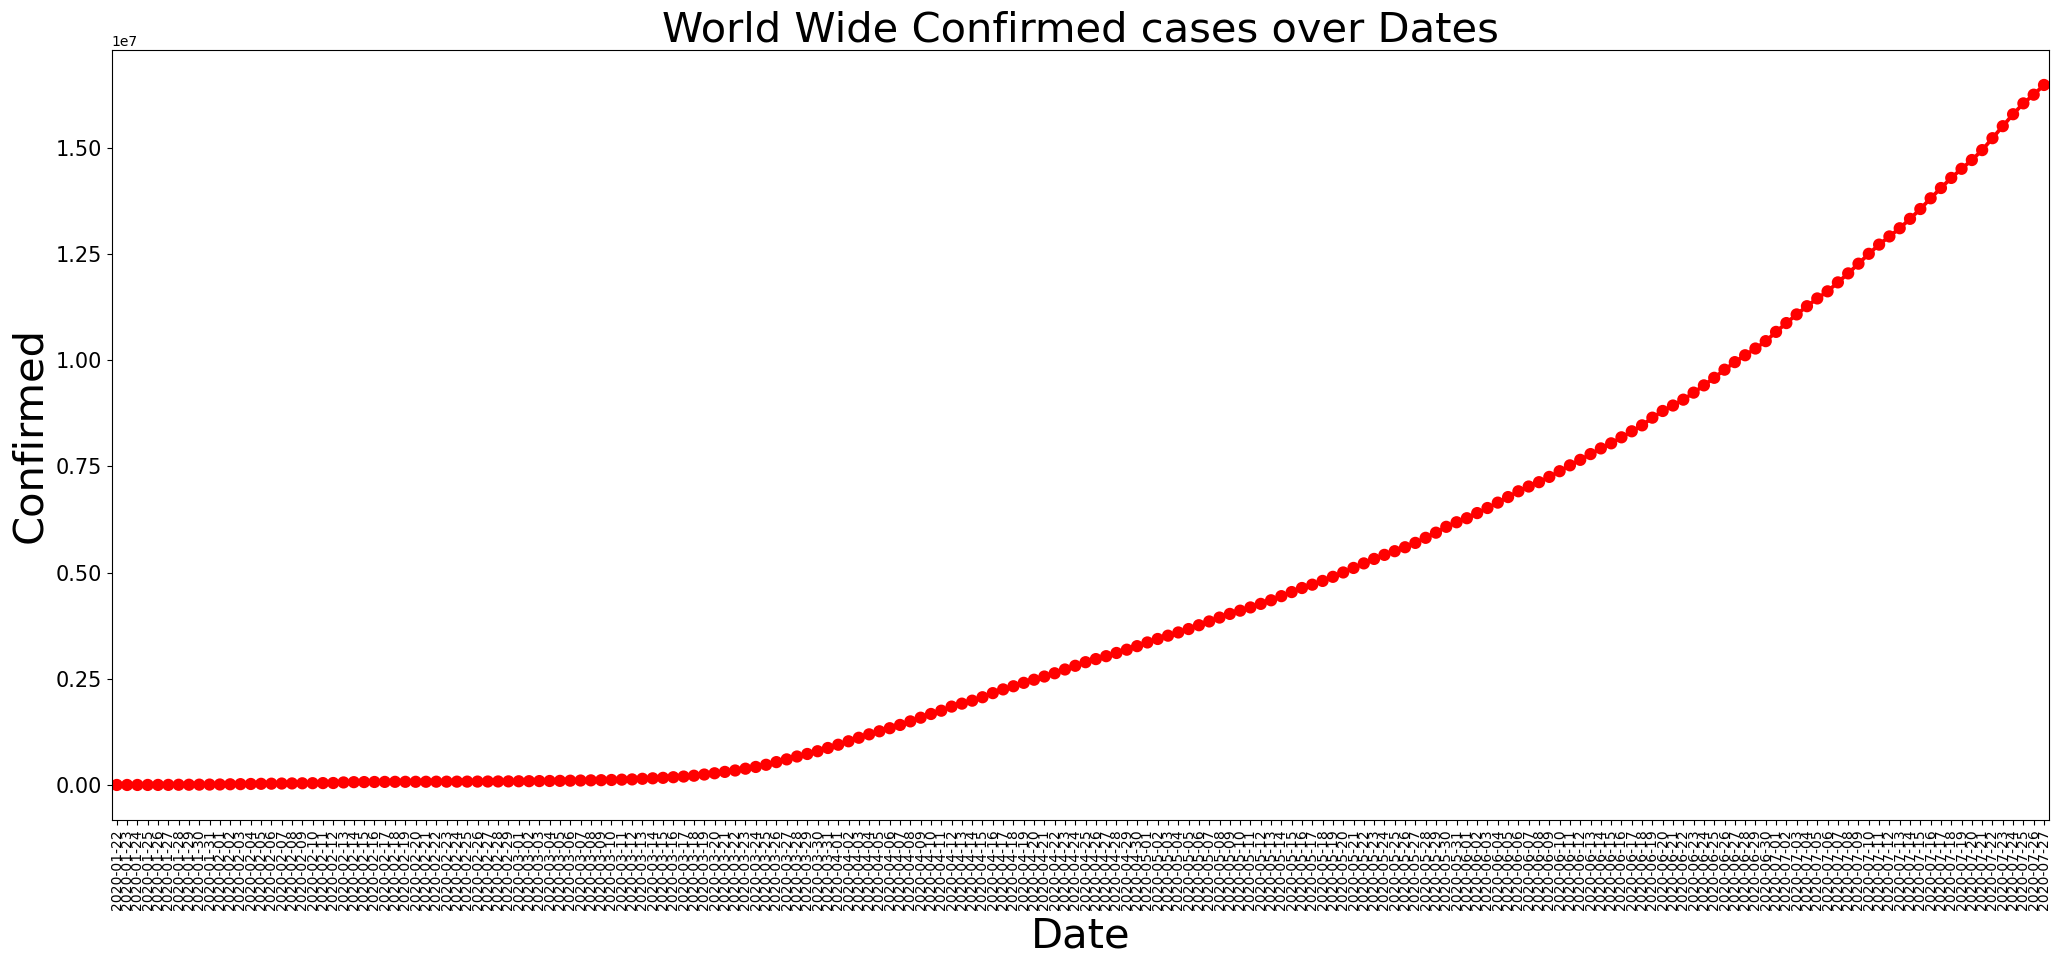

In [15]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.title('World Wide Confirmed cases over Dates',fontsize=30)
ax=sns.pointplot(x=Total_cases['Date'],y=Total_cases['Confirmed'],color='r')
ax.set()

[]

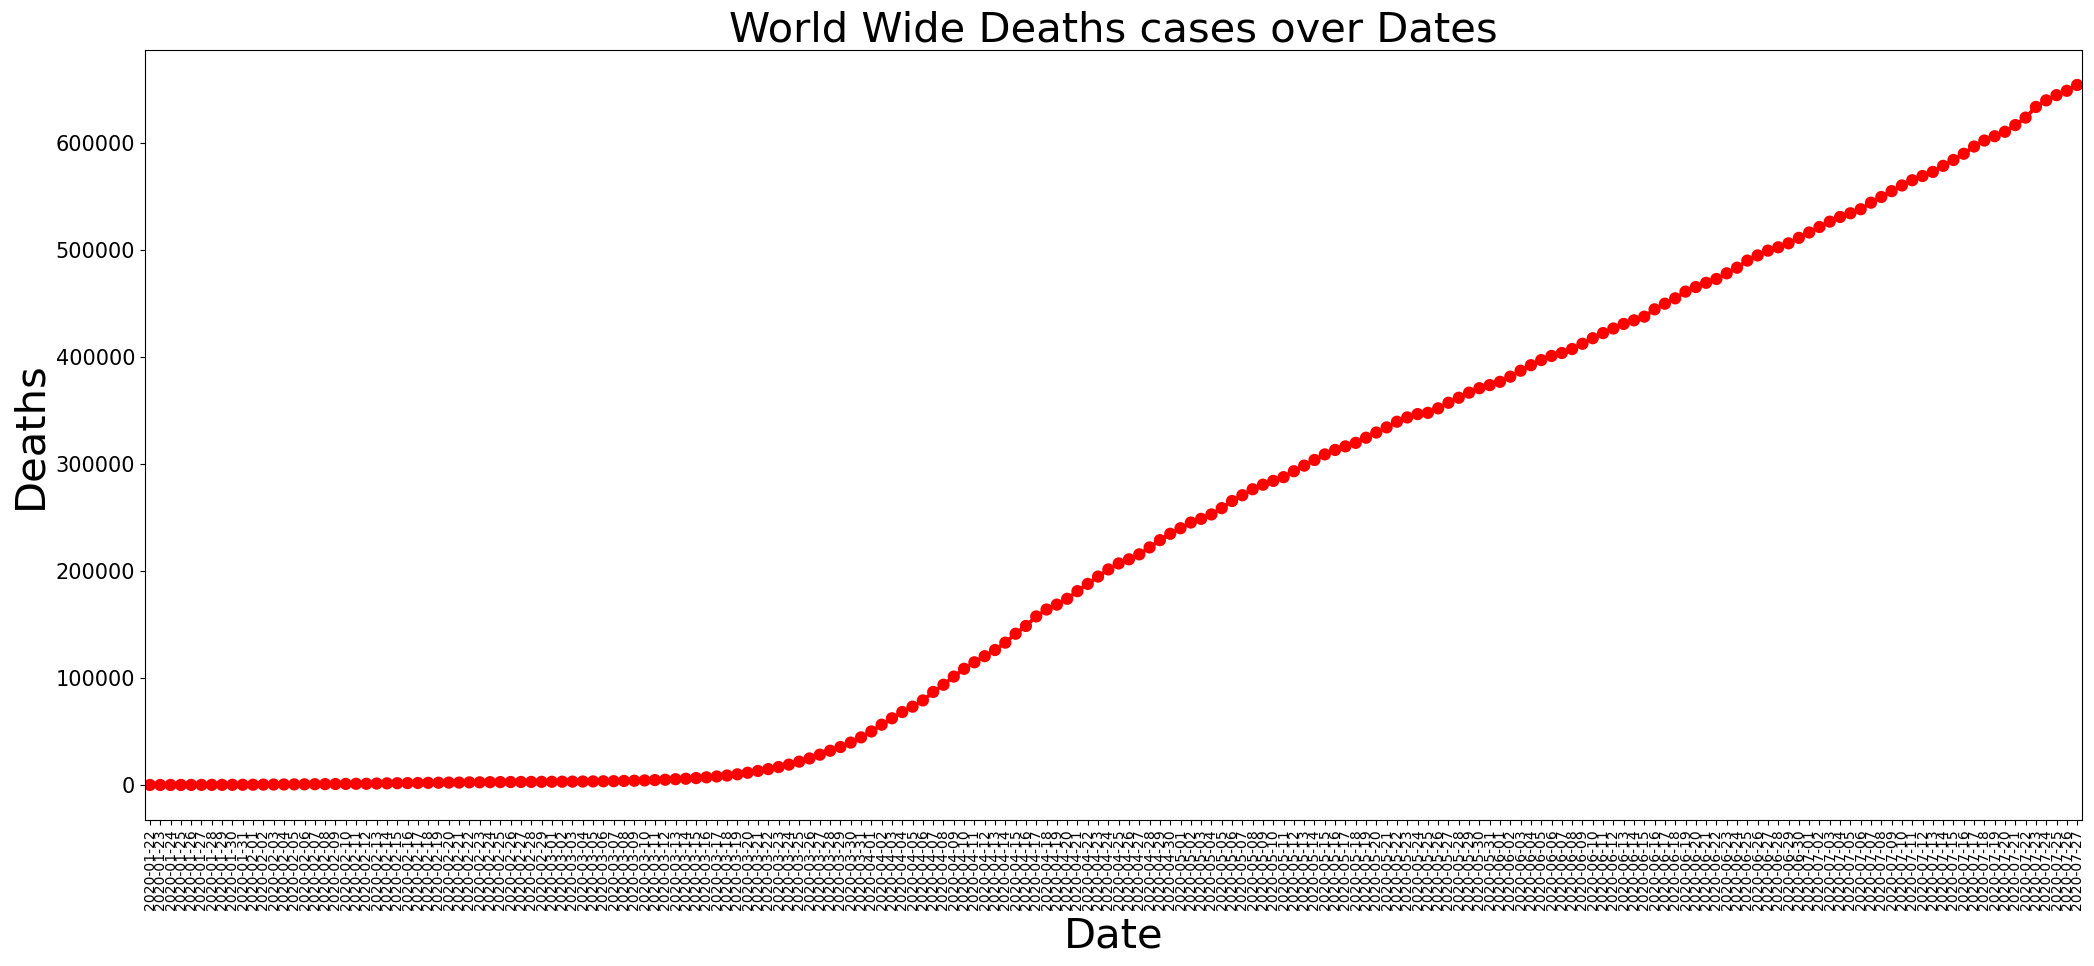

In [16]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.title('World Wide Deaths cases over Dates',fontsize=30)
Total_cases=df.groupby("Date")['Deaths'].sum().reset_index()
ax=sns.pointplot(x=Total_cases['Date'],y=Total_cases['Deaths'],color='r')
ax.set()

[]

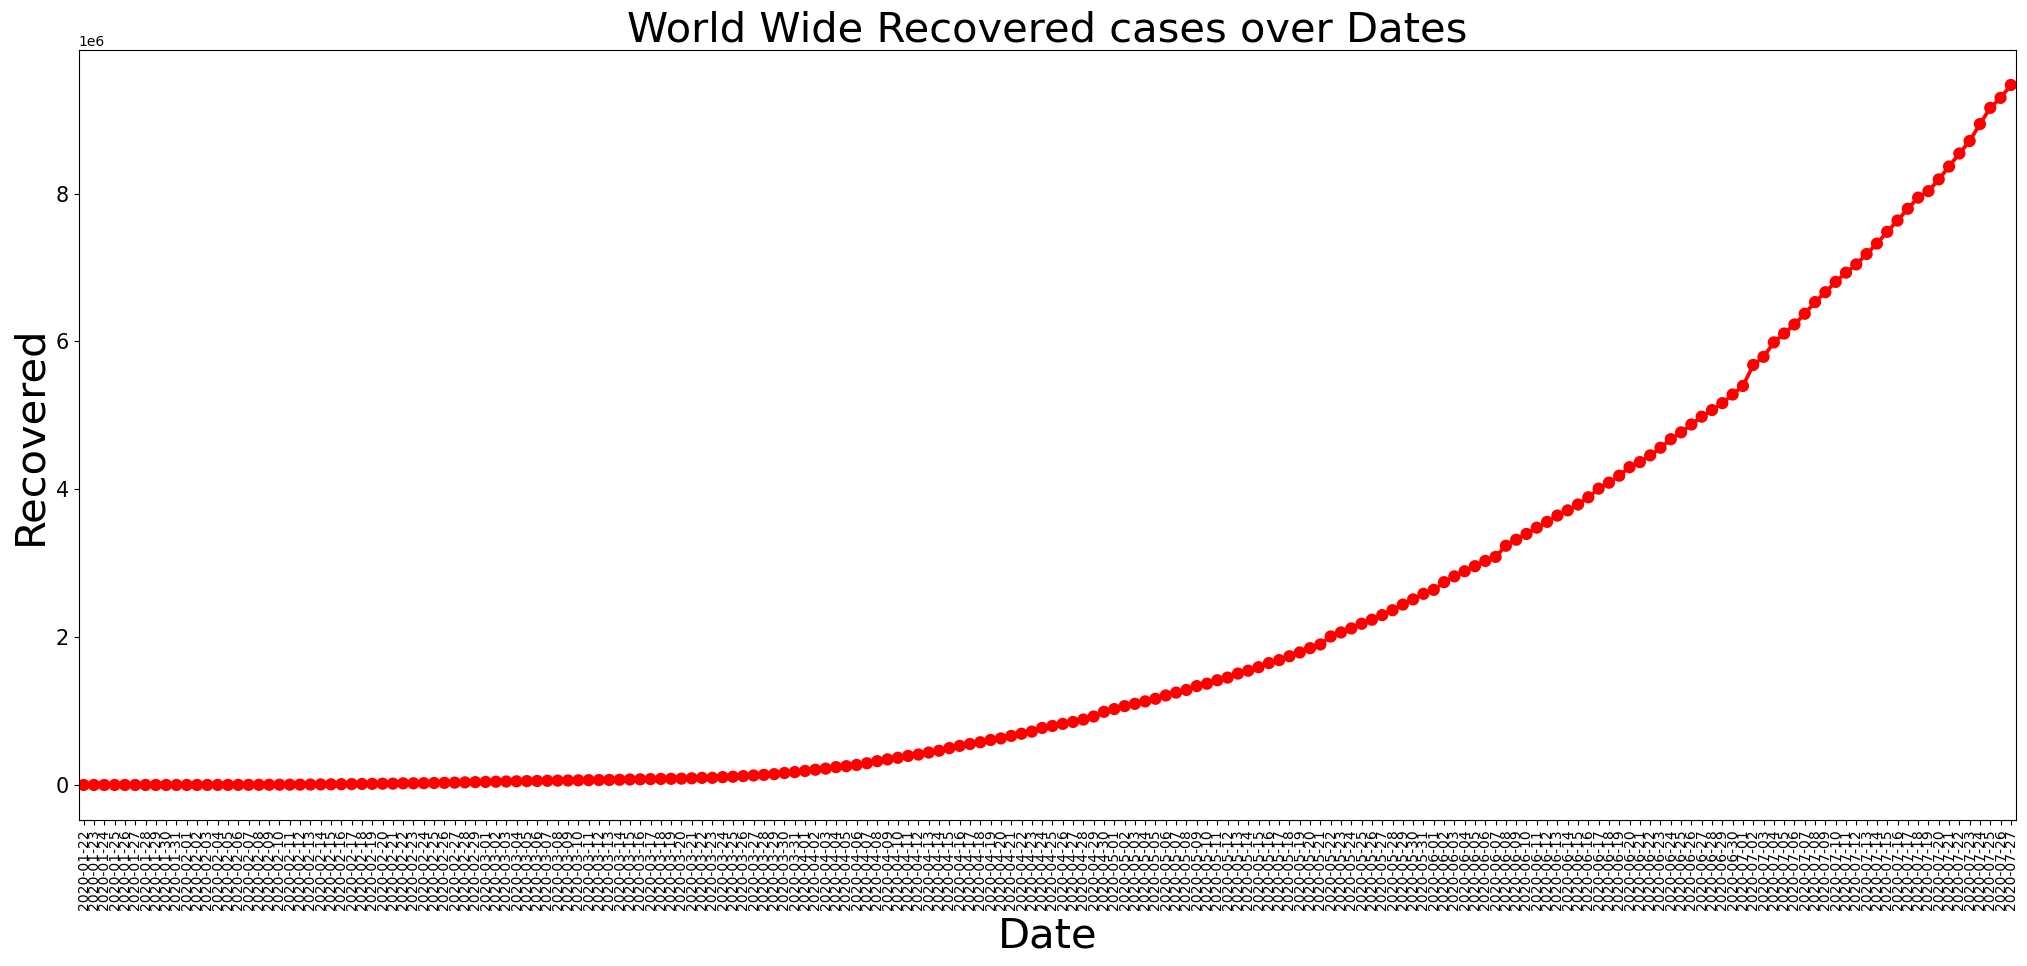

In [17]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.title('World Wide Recovered cases over Dates',fontsize=30)
Total_cases=df.groupby("Date")['Recovered'].sum().reset_index()
ax=sns.pointplot(x=Total_cases['Date'],y=Total_cases['Recovered'],color='r')
ax.set()

[]

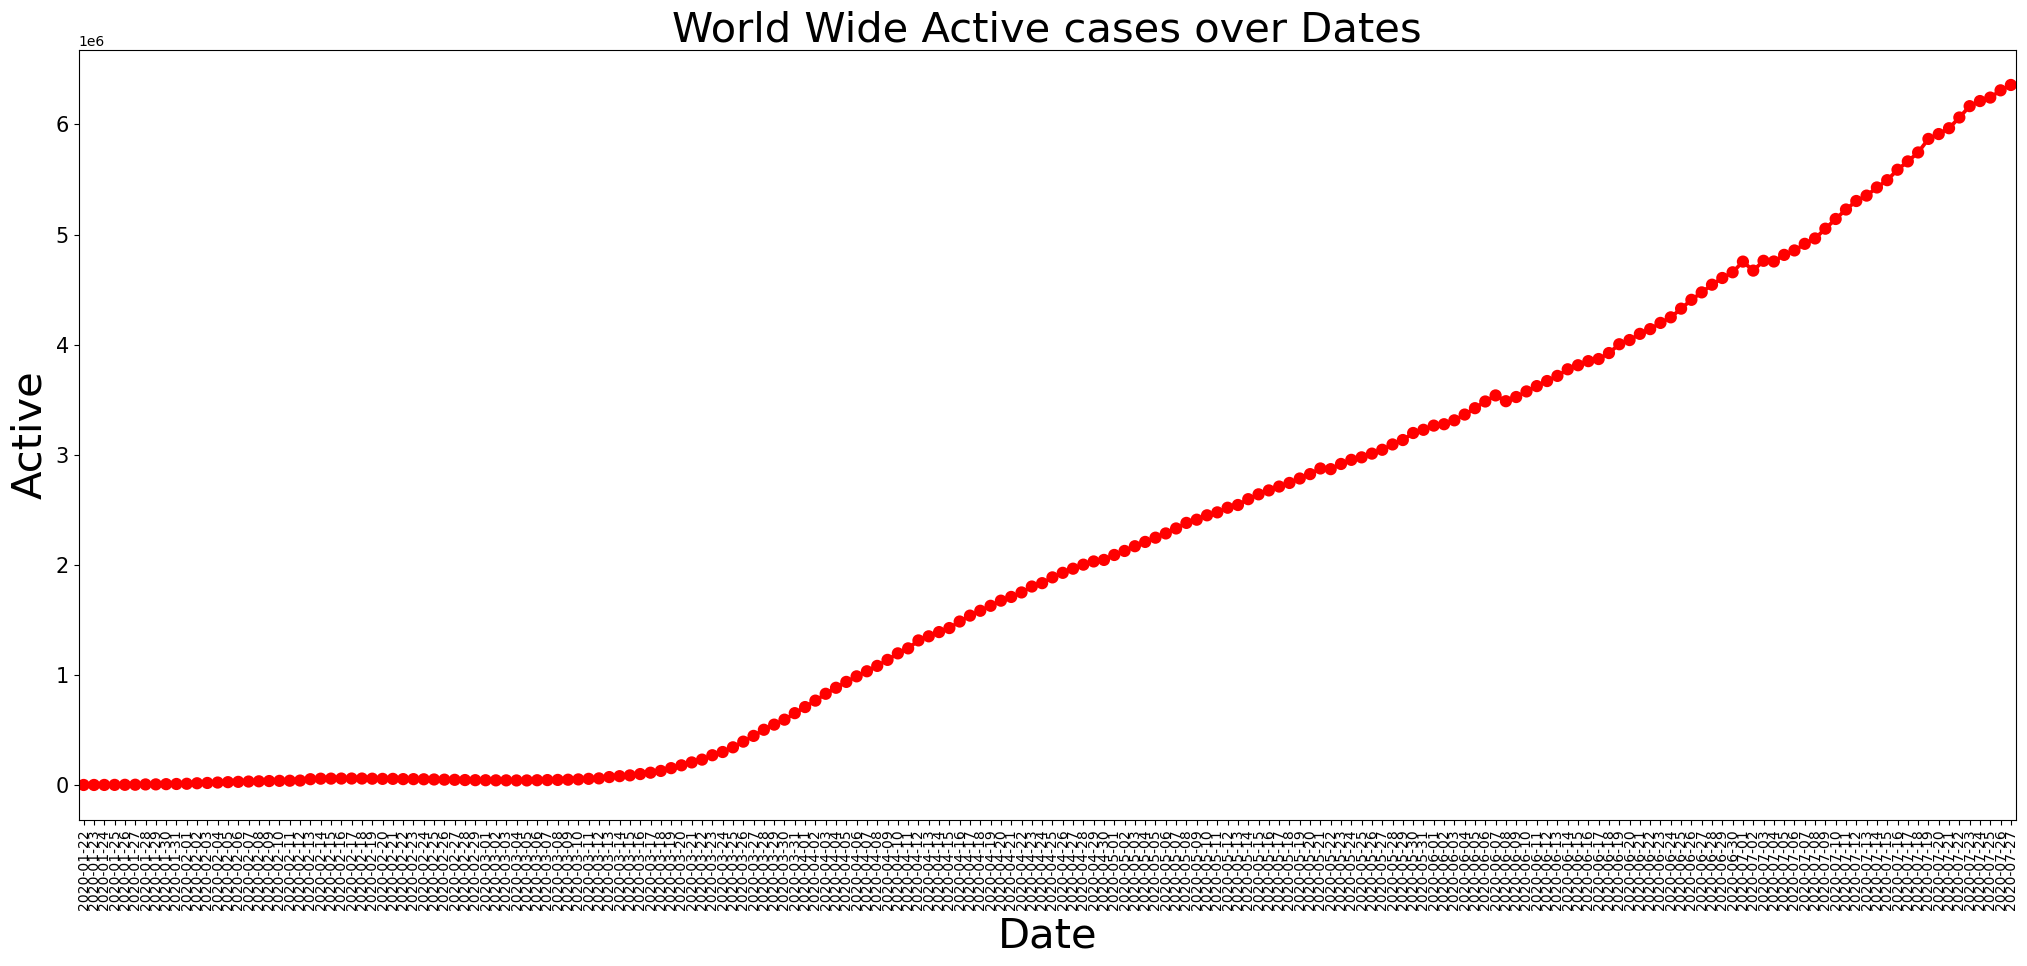

In [18]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.title('World Wide Active cases over Dates',fontsize=30)
Total_cases=df.groupby("Date")['Active'].sum().reset_index()
ax=sns.pointplot(x=Total_cases['Date'],y=Total_cases['Active'],color='r')
ax.set()

In [19]:
Top_Active_Cases=top.groupby('country')["Active"].sum().sort_values(ascending=False).head(10).reset_index()
Top_Active_Cases

country   Active
0              US  2816444
1          Brazil   508116
2           India   495499
3  United Kingdom   254427
4          Russia   201097
5    South Africa   170537
6        Colombia   117163
7          France   108928
8          Canada   107514
9            Peru    98752

[]

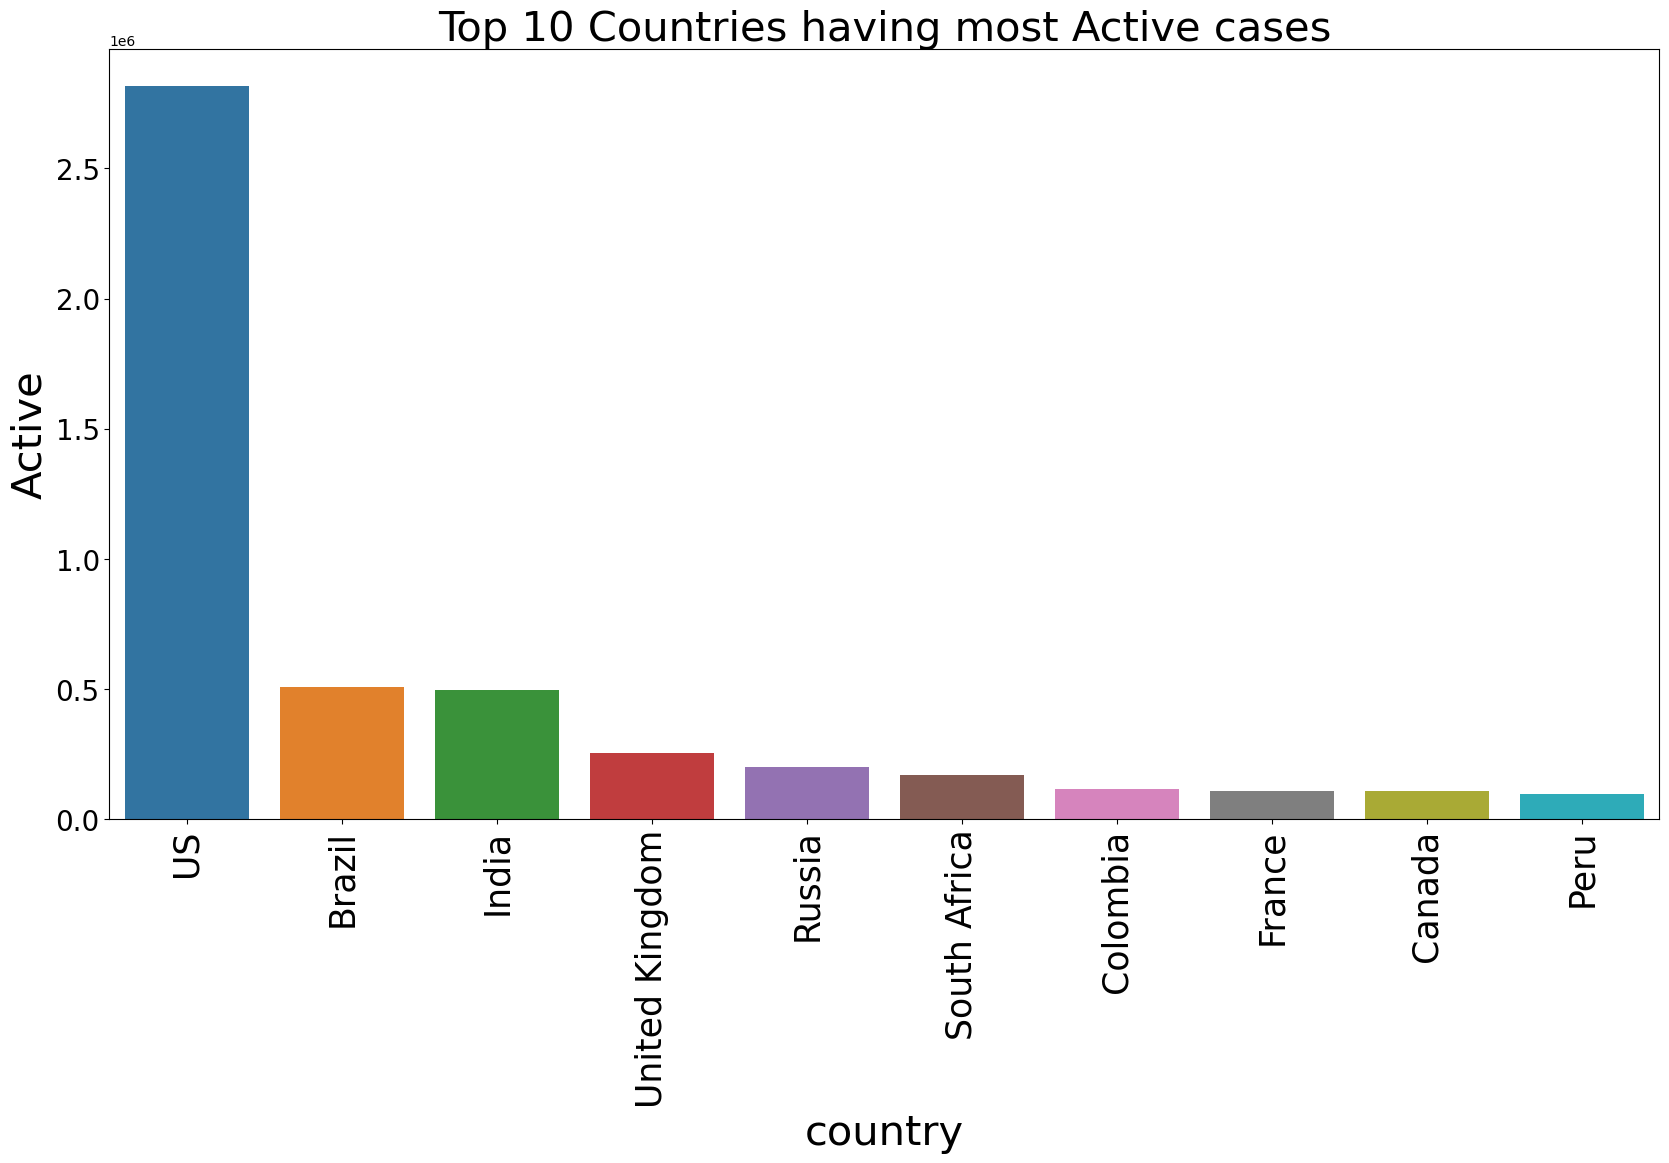

In [20]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=20)
plt.xlabel('Country',fontsize=30)
plt.ylabel('Total Cases in cores',fontsize=30)
plt.title('Top 10 Countries having most Active cases',fontsize=30)
ax=sns.barplot(x=Top_Active_Cases.country,y=Top_Active_Cases.Active)
ax.set()

[]

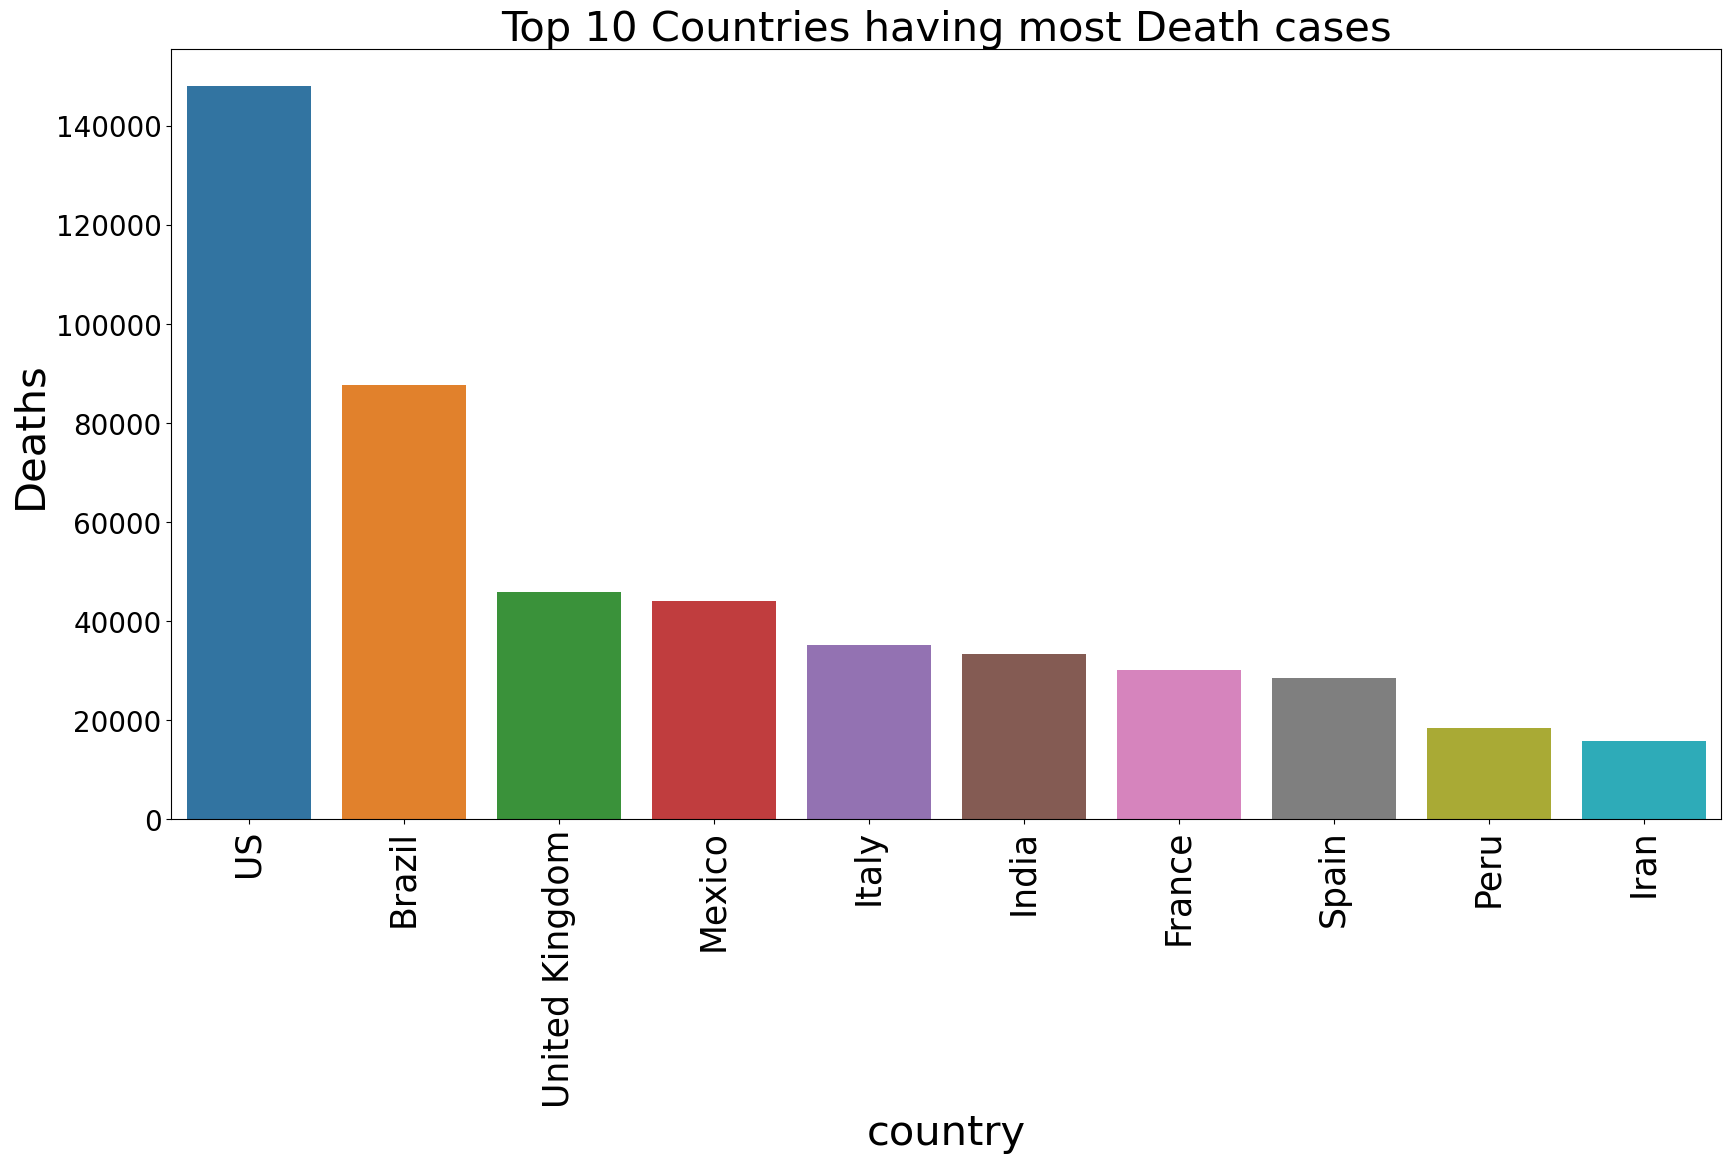

In [21]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=20)
plt.xlabel('Country',fontsize=30)
plt.ylabel('Total Cases ',fontsize=30)
plt.title('Top 10 Countries having most Death cases',fontsize=30)
Top_death_Cases=top.groupby("country")['Deaths'].sum().sort_values(ascending=False).head(10).reset_index()
ax=sns.barplot(x=Top_death_Cases.country,y=Top_death_Cases.Deaths)
ax.set()

[]

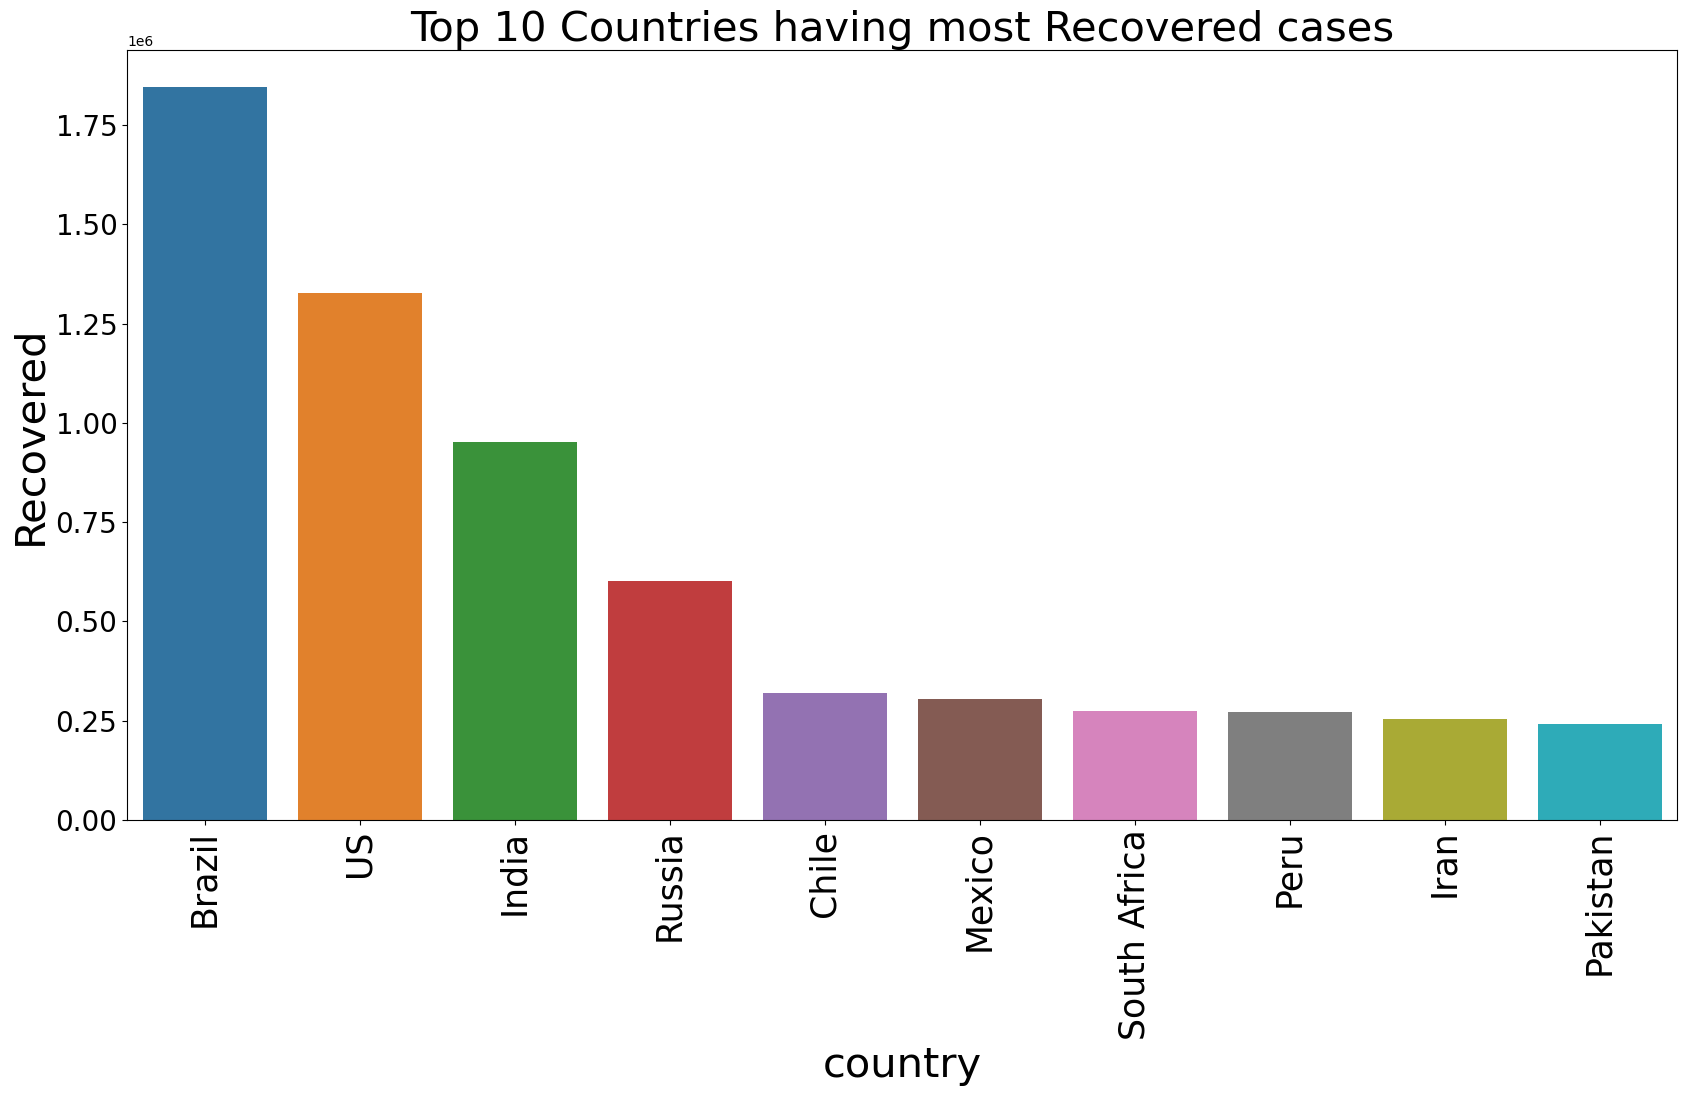

In [22]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=20)
plt.xlabel('Country',fontsize=30)
plt.ylabel('Total Cases ',fontsize=30)
plt.title('Top 10 Countries having most Recovered cases',fontsize=30)
Top_recovered_Cases=top.groupby("country")['Recovered'].sum().sort_values(ascending=False).head(10).reset_index()
ax=sns.barplot(x=Top_recovered_Cases.country,y=Top_recovered_Cases.Recovered)
ax.set()

In [23]:
brazil=df[df['country']=='Brazil']
brazil.groupby('Date')[['Confirmed','Active','Deaths','Recovered']].sum()

Confirmed  Active  Deaths  Recovered
Date                                            
2020-01-22          0       0       0          0
2020-01-23          0       0       0          0
2020-01-24          0       0       0          0
2020-01-25          0       0       0          0
2020-01-26          0       0       0          0
...               ...     ...     ...        ...
2020-07-23    2287475  583080   84082    1620313
2020-07-24    2343366  564914   85238    1693214
2020-07-25    2394513  522705   86449    1785359
2020-07-26    2419091  519174   87004    1812913
2020-07-27    2442375  508116   87618    1846641

[188 rows x 4 columns]

In [24]:
india=df[df['country']=='India']
india.groupby('Date')[['Confirmed','Active','Deaths','Recovered']].sum()

Confirmed  Active  Deaths  Recovered
Date                                            
2020-01-22          0       0       0          0
2020-01-23          0       0       0          0
2020-01-24          0       0       0          0
2020-01-25          0       0       0          0
2020-01-26          0       0       0          0
...               ...     ...     ...        ...
2020-07-23    1288108  440298   30601     817209
2020-07-24    1337024  456234   31358     849432
2020-07-25    1385635  468002   32060     885573
2020-07-26    1435616  485277   32771     917568
2020-07-27    1480073  495499   33408     951166

[188 rows x 4 columns]

In [25]:
us=df[df['country']=='US']
us.groupby('Date')[['Confirmed','Active','Deaths','Recovered']].sum()

Confirmed   Active  Deaths  Recovered
Date                                             
2020-01-22          1        1       0          0
2020-01-23          1        1       0          0
2020-01-24          2        2       0          0
2020-01-25          2        2       0          0
2020-01-26          5        5       0          0
...               ...      ...     ...        ...
2020-07-23    4038816  2661117  144430    1233269
2020-07-24    4112531  2705347  145560    1261624
2020-07-25    4178970  2753091  146465    1279414
2020-07-26    4233923  2789125  146935    1297863
2020-07-27    4290259  2816444  148011    1325804

[188 rows x 4 columns]

In [26]:
russia=df[df['country']=='Russia']
russia.groupby('Date')[['Confirmed','Active','Deaths','Recovered']].sum()

Confirmed  Active  Deaths  Recovered
Date                                            
2020-01-22          0       0       0          0
2020-01-23          0       0       0          0
2020-01-24          0       0       0          0
2020-01-25          0       0       0          0
2020-01-26          0       0       0          0
...               ...     ...     ...        ...
2020-07-23     793720  201552   12873     579295
2020-07-24     799499  198745   13026     587728
2020-07-25     805332  196096   13172     596064
2020-07-26     811073  198652   13249     599172
2020-07-27     816680  201097   13334     602249

[188 rows x 4 columns]

In [27]:
united_kingdom=df[df['country']=='United Kingdom']
united_kingdom.groupby('Date')[['Confirmed','Active','Deaths','Recovered']].sum()

Confirmed  Active  Deaths  Recovered
Date                                            
2020-01-22          0       0       0          0
2020-01-23          0       0       0          0
2020-01-24          0       0       0          0
2020-01-25          0       0       0          0
2020-01-26          0       0       0          0
...               ...     ...     ...        ...
2020-07-23     298731  251667   45639       1425
2020-07-24     299500  252313   45762       1425
2020-07-25     300270  253020   45823       1427
2020-07-26     301020  253749   45837       1434
2020-07-27     301708  254427   45844       1437

[188 rows x 4 columns]

[]

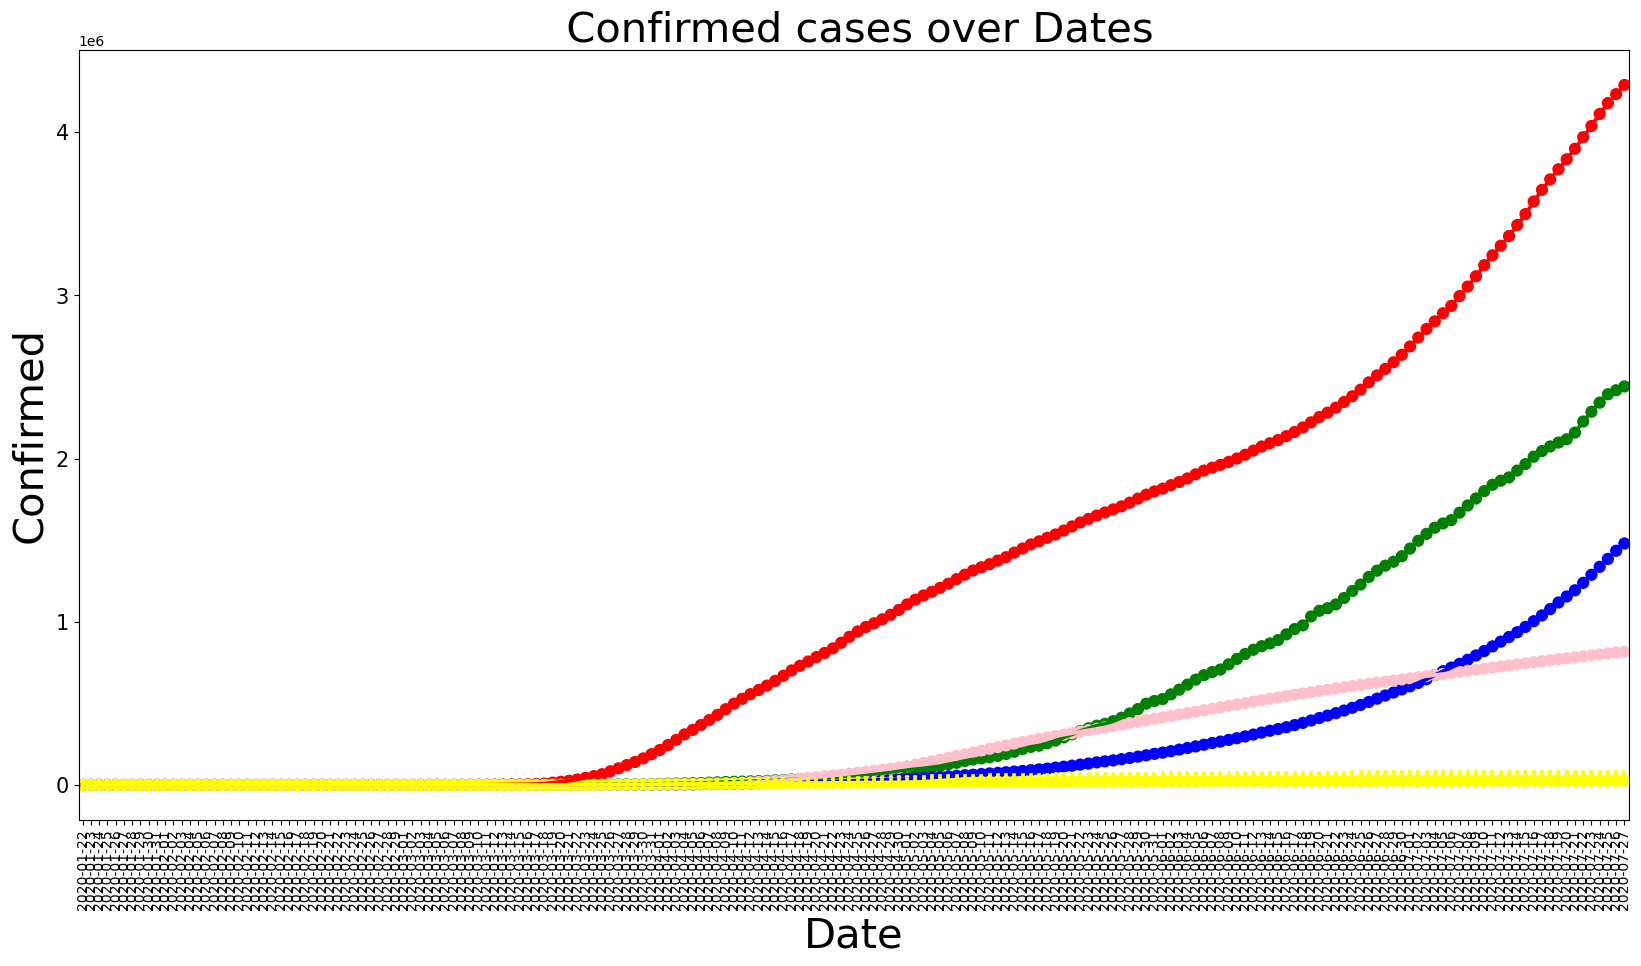

In [28]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Confirmed Cases',fontsize=30)
plt.title(' Confirmed cases over Dates',fontsize=30)
ax=sns.pointplot(x=brazil['Date'],y=brazil['Confirmed'],color='Green')
ax=sns.pointplot(x=india['Date'],y=india['Confirmed'],color='Blue')
ax=sns.pointplot(x=us['Date'],y=us['Confirmed'],color='Red')
ax=sns.pointplot(x=russia['Date'],y=russia['Confirmed'],color='Pink')
ax=sns.pointplot(x=united_kingdom['Date'],y=united_kingdom['Confirmed'],color='Yellow')
ax.set()

[]

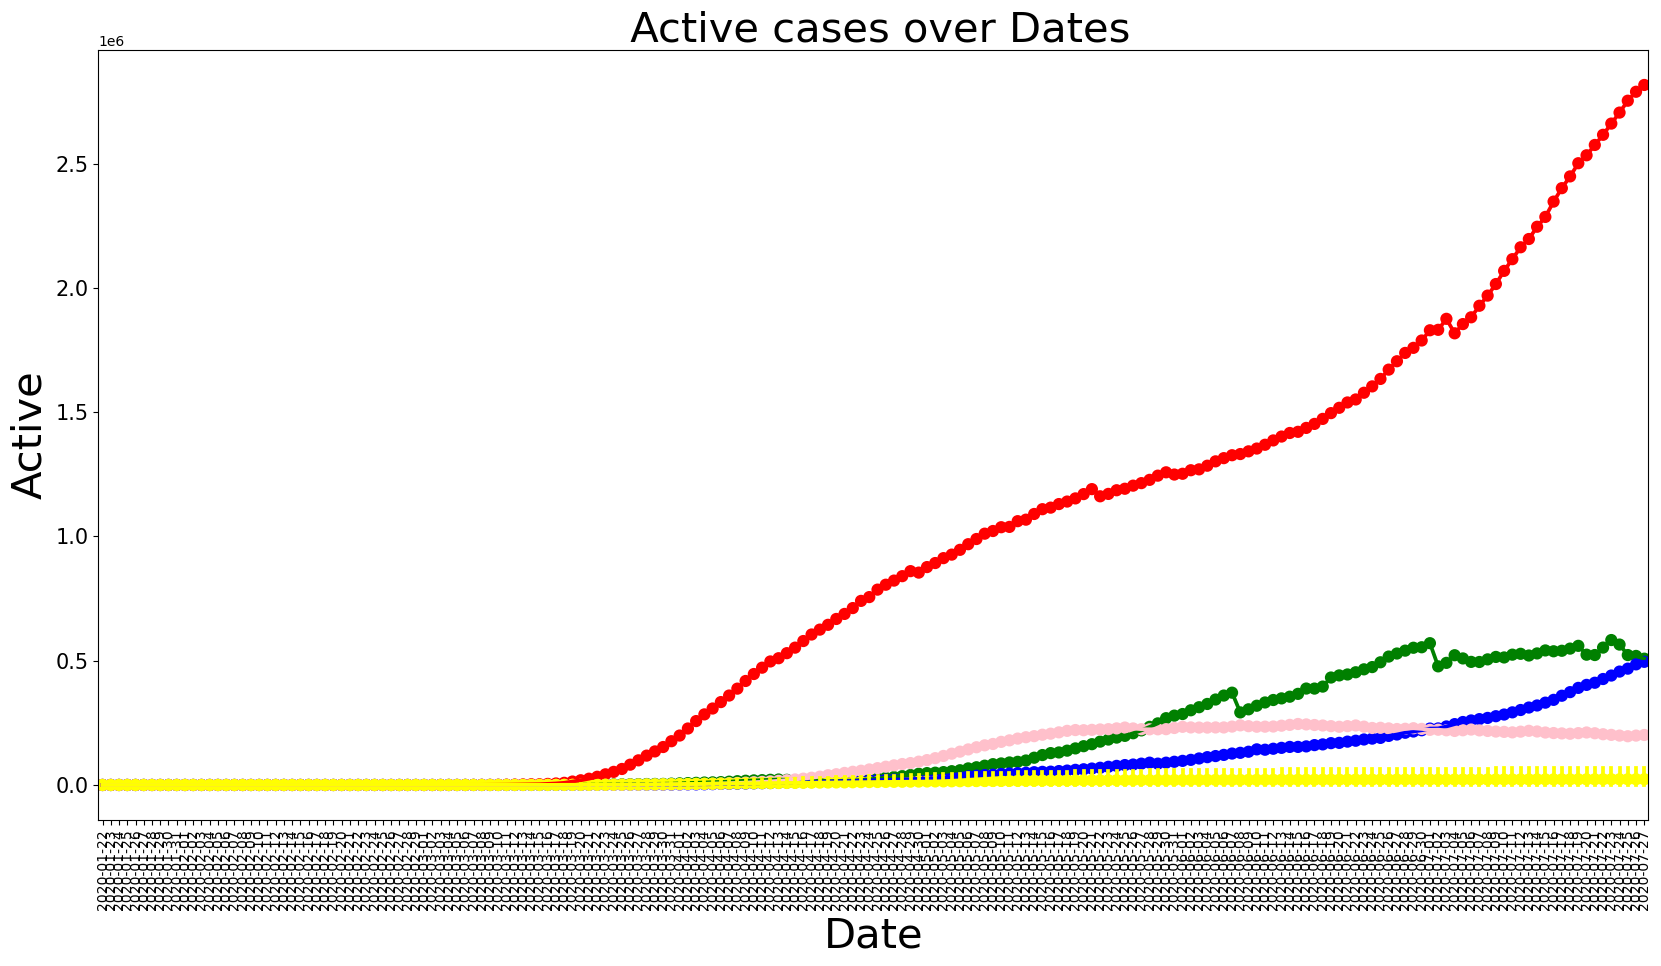

In [29]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Active Cases',fontsize=30)
plt.title(' Active cases over Dates',fontsize=30)
ax=sns.pointplot(x=brazil['Date'],y=brazil['Active'],color='Green')
ax=sns.pointplot(x=india['Date'],y=india['Active'],color='Blue')
ax=sns.pointplot(x=us['Date'],y=us['Active'],color='Red')
ax=sns.pointplot(x=russia['Date'],y=russia['Active'],color='Pink')
ax=sns.pointplot(x=united_kingdom['Date'],y=united_kingdom['Active'],color='Yellow')
ax.set()

[]

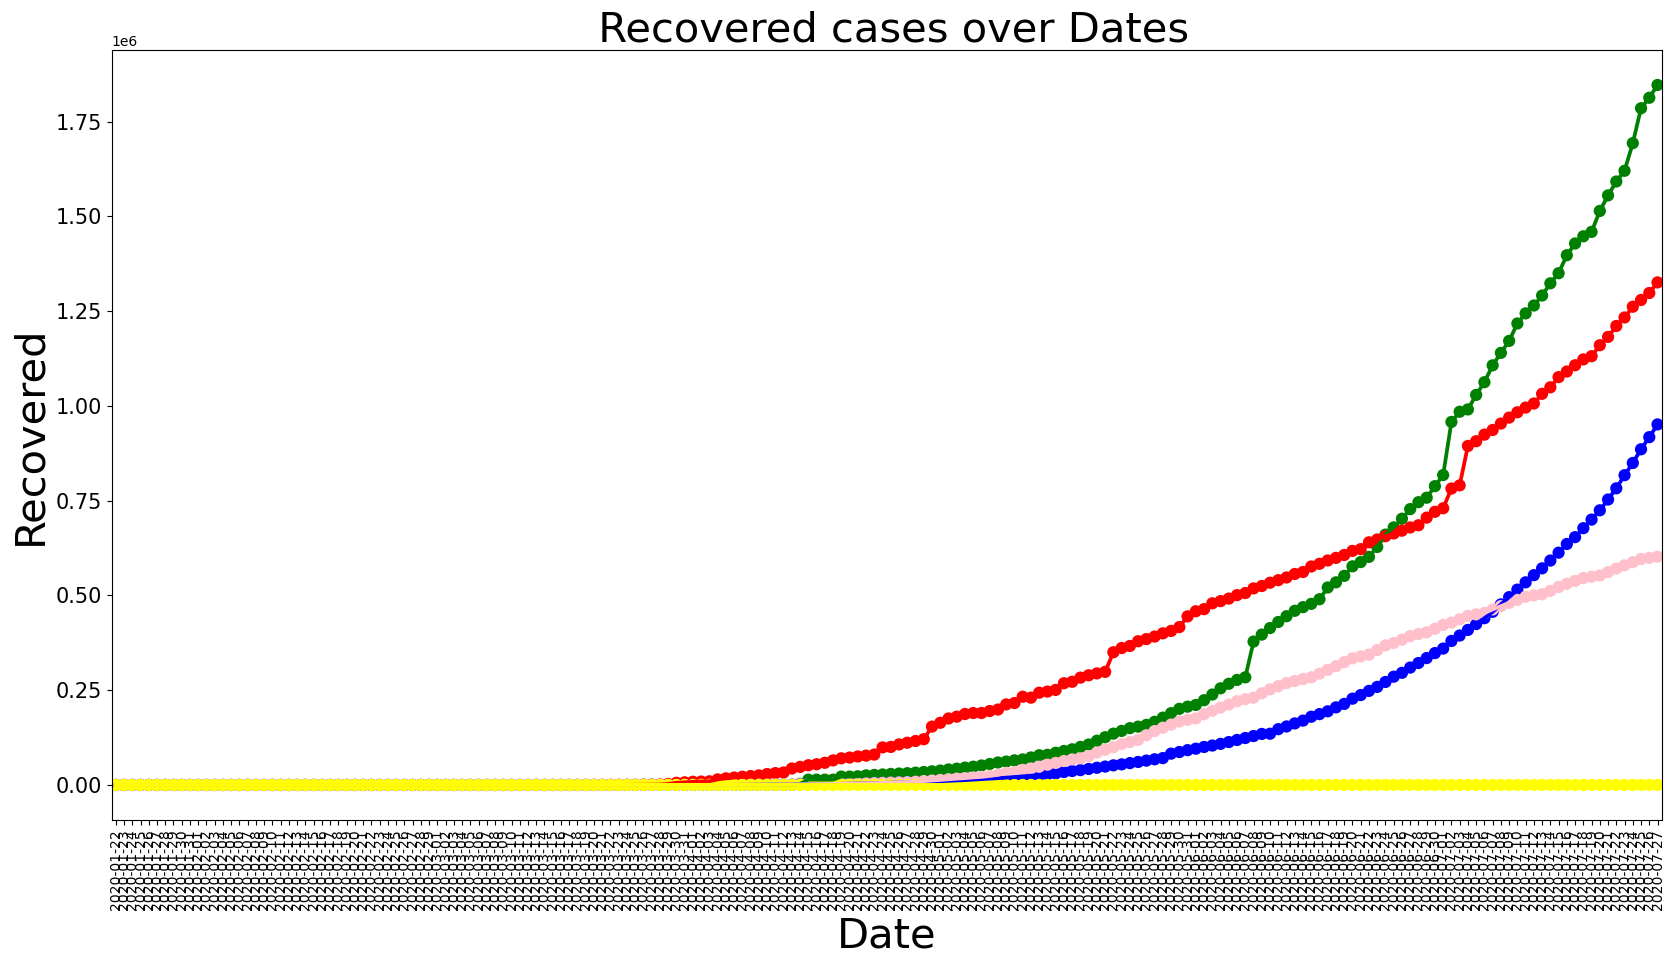

In [30]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Recovered Cases',fontsize=30)
plt.title(' Recovered cases over Dates',fontsize=30)
ax=sns.pointplot(x=brazil['Date'],y=brazil['Recovered'],color='Green')
ax=sns.pointplot(x=india['Date'],y=india['Recovered'],color='Blue')
ax=sns.pointplot(x=us['Date'],y=us['Recovered'],color='Red')
ax=sns.pointplot(x=russia['Date'],y=russia['Recovered'],color='Pink')
ax=sns.pointplot(x=united_kingdom['Date'],y=united_kingdom['Recovered'],color='Yellow')
ax.set()

[]

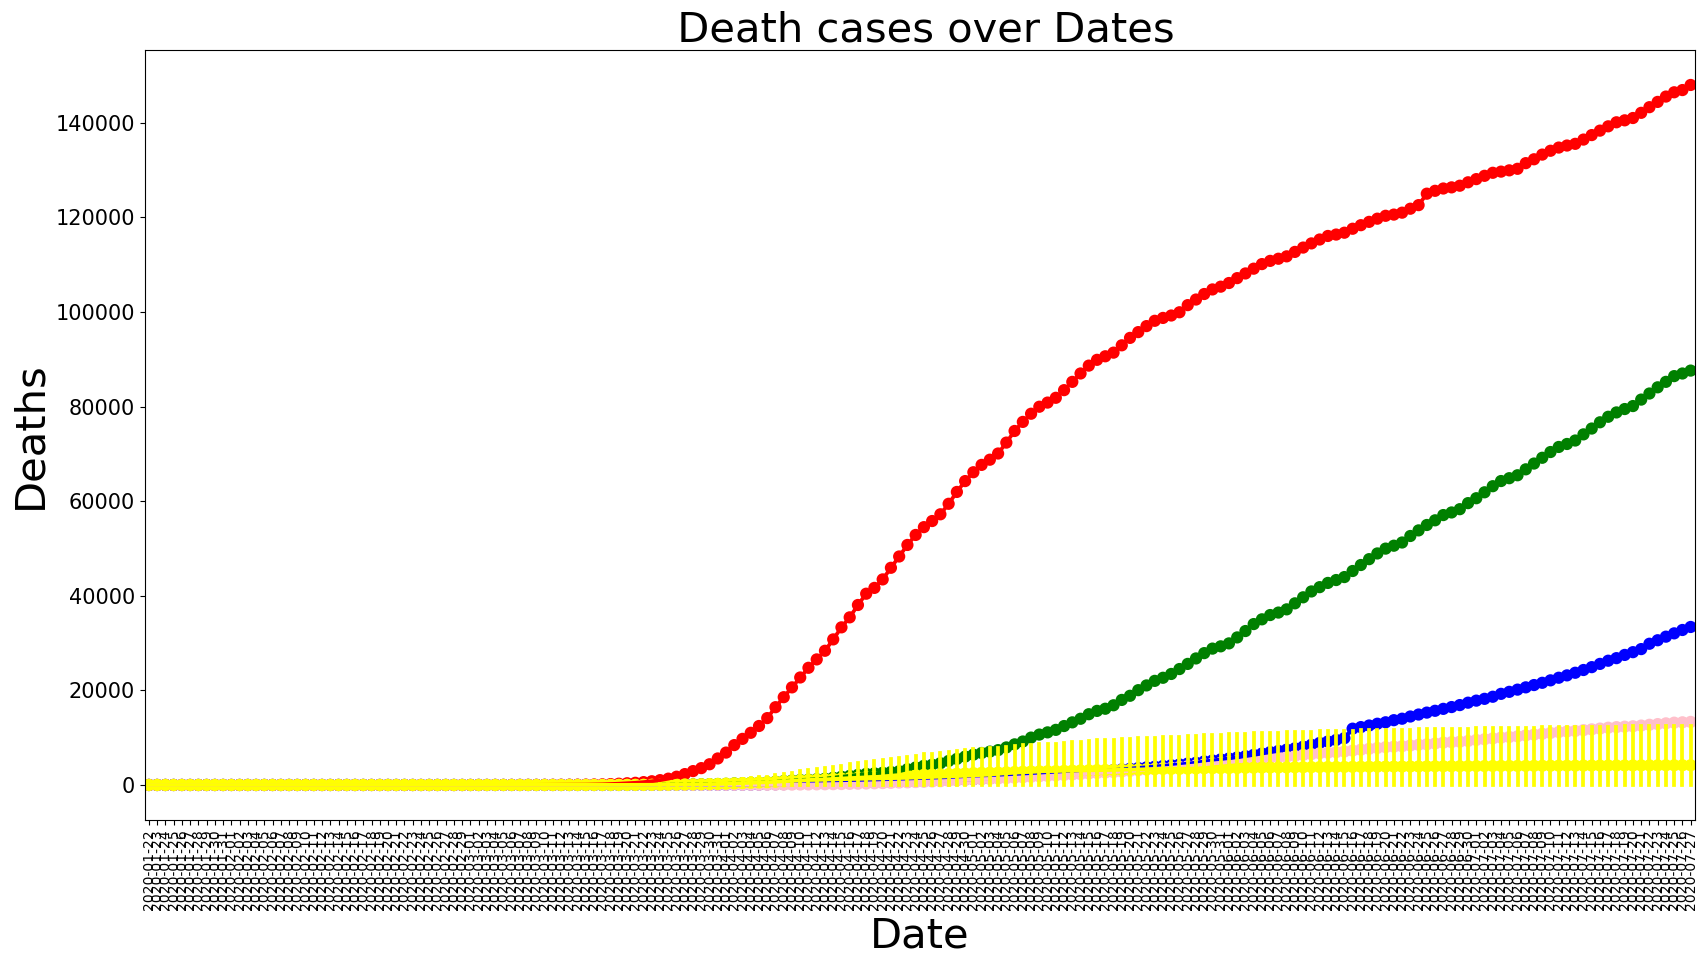

In [31]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Death Cases',fontsize=30)
plt.title(' Death cases over Dates',fontsize=30)
ax=sns.pointplot(x=brazil['Date'],y=brazil['Deaths'],color='Green')
ax=sns.pointplot(x=india['Date'],y=india['Deaths'],color='Blue')
ax=sns.pointplot(x=us['Date'],y=us['Deaths'],color='Red')
ax=sns.pointplot(x=russia['Date'],y=russia['Deaths'],color='Pink')
ax=sns.pointplot(x=united_kingdom['Date'],y=united_kingdom['Deaths'],color='Yellow')
ax.set()

# **Forecasting The Data**

In [33]:
from prophet import Prophet

In [34]:
Confirmed=df.groupby('Date')['Confirmed'].sum().reset_index()
Confirmed

Date  Confirmed
0    2020-01-22        555
1    2020-01-23        654
2    2020-01-24        941
3    2020-01-25       1434
4    2020-01-26       2118
..          ...        ...
183  2020-07-23   15510481
184  2020-07-24   15791645
185  2020-07-25   16047190
186  2020-07-26   16251796
187  2020-07-27   16480485

[188 rows x 2 columns]

In [35]:
Active=df.groupby('Date')['Active'].sum().reset_index()
Active

Date   Active
0    2020-01-22      510
1    2020-01-23      606
2    2020-01-24      879
3    2020-01-25     1353
4    2020-01-26     2010
..          ...      ...
183  2020-07-23  6166006
184  2020-07-24  6212290
185  2020-07-25  6243930
186  2020-07-26  6309711
187  2020-07-27  6358362

[188 rows x 2 columns]

In [36]:
Death=df.groupby('Date')['Deaths'].sum().reset_index()
Death

Date  Deaths
0    2020-01-22      17
1    2020-01-23      18
2    2020-01-24      26
3    2020-01-25      42
4    2020-01-26      56
..          ...     ...
183  2020-07-23  633506
184  2020-07-24  639650
185  2020-07-25  644517
186  2020-07-26  648621
187  2020-07-27  654036

[188 rows x 2 columns]

In [37]:
Recovered=df.groupby('Date')['Recovered'].sum().reset_index()
Recovered

Date  Recovered
0    2020-01-22         28
1    2020-01-23         30
2    2020-01-24         36
3    2020-01-25         39
4    2020-01-26         52
..          ...        ...
183  2020-07-23    8710969
184  2020-07-24    8939705
185  2020-07-25    9158743
186  2020-07-26    9293464
187  2020-07-27    9468087

[188 rows x 2 columns]

In [38]:
Confirmed=Confirmed.rename(columns={'Date':'ds','Confirmed':'y'})
Confirmed

ds         y
0    2020-01-22       555
1    2020-01-23       654
2    2020-01-24       941
3    2020-01-25      1434
4    2020-01-26      2118
..          ...       ...
183  2020-07-23  15510481
184  2020-07-24  15791645
185  2020-07-25  16047190
186  2020-07-26  16251796
187  2020-07-27  16480485

[188 rows x 2 columns]

In [47]:
model=Prophet(interval_width=0.95)
model

In [48]:
model.fit(Confirmed)

21:50:51 - cmdstanpy - INFO - Chain [1] start processing
21:50:51 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
future=model.make_future_dataframe(periods=7)
future.tail(10)

ds
185 2020-07-25
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [50]:
Future_predictions=model.predict(future)
Future_predictions[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

ds          yhat    yhat_lower    yhat_upper
185 2020-07-25  1.574174e+07  1.558727e+07  1.590306e+07
186 2020-07-26  1.593953e+07  1.576939e+07  1.610702e+07
187 2020-07-27  1.613441e+07  1.598014e+07  1.630774e+07
188 2020-07-28  1.632401e+07  1.617230e+07  1.648540e+07
189 2020-07-29  1.653405e+07  1.637527e+07  1.670362e+07
190 2020-07-30  1.674820e+07  1.657502e+07  1.690322e+07
191 2020-07-31  1.696362e+07  1.680581e+07  1.711172e+07
192 2020-08-01  1.717143e+07  1.700631e+07  1.733568e+07
193 2020-08-02  1.736922e+07  1.720445e+07  1.755300e+07
194 2020-08-03  1.756410e+07  1.736974e+07  1.774904e+07

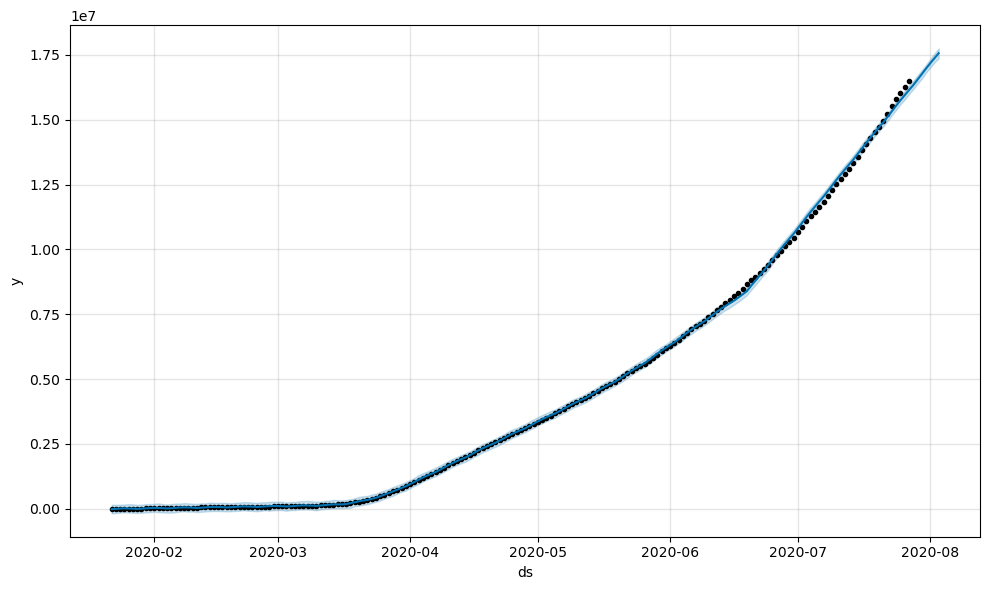

In [51]:
Forecaste=model.plot(Future_predictions)

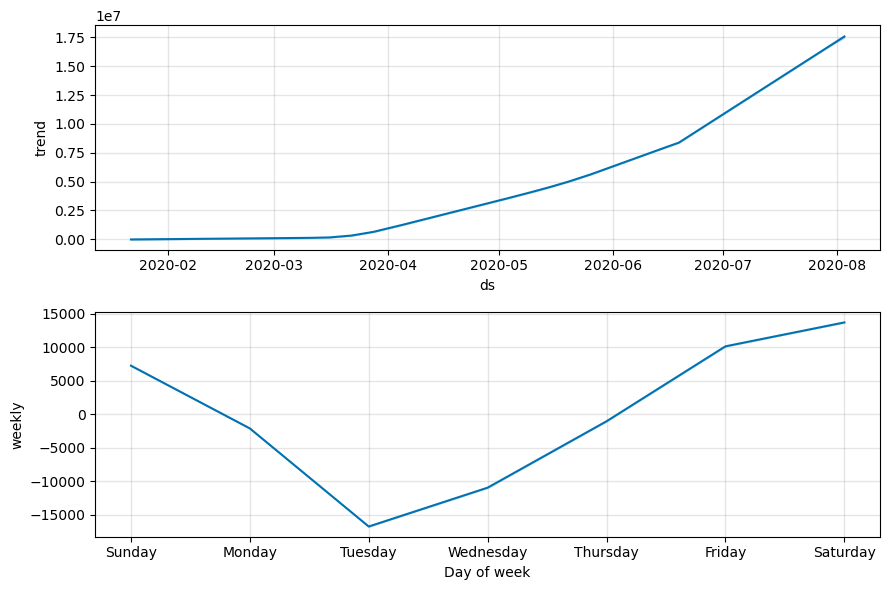

In [52]:
Forecaste_plot1=model.plot_components(Future_predictions)